### **LOADING LIBRARIES AND THE DATA FILE**

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
social = pd.read_csv("social_media_shares.csv")

### **EXPLANTORY DATA ANALYSIS**

In [35]:
social.head(5) #show 1st 5 rows on default

,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [36]:
social.describe()

,tokens_title,tokens_content,unique_tokens,non_stop_words,non_stop_unique_tokens,hrefs,self_refs,imgs,videos,token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [37]:
social.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tokens_title                  39644 non-null  int64  
 1   tokens_content                39644 non-null  int64  
 2   unique_tokens                 39644 non-null  float64
 3   non_stop_words                39644 non-null  float64
 4   non_stop_unique_tokens        39644 non-null  float64
 5   hrefs                         39644 non-null  int64  
 6   self_refs                     39644 non-null  int64  
 7   imgs                          39644 non-null  int64  
 8   videos                        39644 non-null  int64  
 9   token_length                  39644 non-null  float64
 10  keywords                      39644 non-null  int64  
 11  lifestyle                     39644 non-null  int64  
 12  entertainment                 39644 non-null  int64  
 13  b

In [38]:
social.shape

(39644, 59)

In [39]:
social.isnull().sum()

tokens_title                    0
tokens_content                  0
unique_tokens                   0
non_stop_words                  0
non_stop_unique_tokens          0
hrefs                           0
self_refs                       0
imgs                            0
videos                          0
token_length                    0
keywords                        0
lifestyle                       0
entertainment                   0
bus                             0
socmed                          0
tech                            0
world                           0
kw_min_min                      0
kw_max_min                      0
kw_avg_min                      0
kw_min_max                      0
kw_max_max                      0
kw_avg_max                      0
kw_min_avg                      0
kw_max_avg                      0
kw_avg_avg                      0
self_reference_min_shares       0
self_reference_max_shares       0
self_reference_avg_shares       0
monday        

### **PLOTTING**

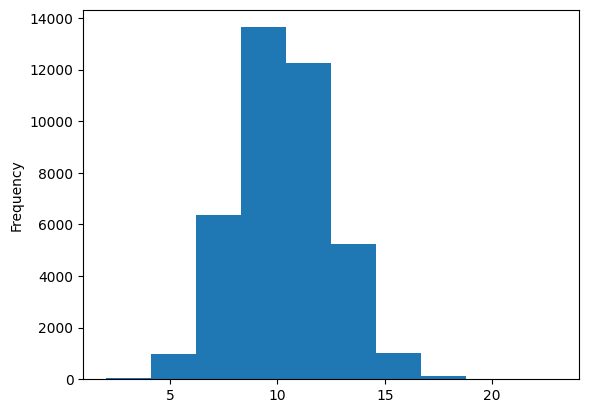

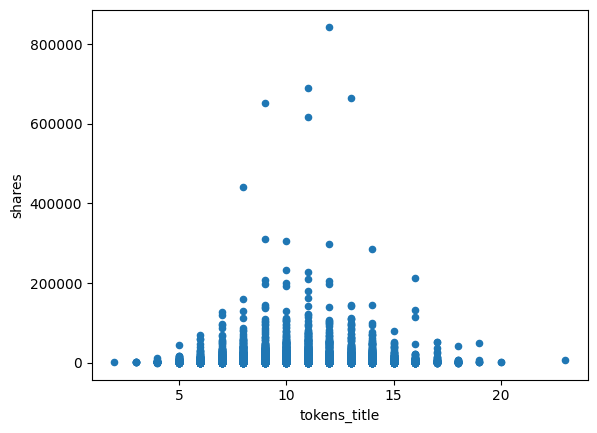

In [40]:
import matplotlib.pyplot as plt

# Histogram of the 'tokens_title' column
social['tokens_title'].plot(kind = 'hist')
plt.show()

# Scatter plot of 'tokens_title' and 'shares' columns
social.plot(x = 'tokens_title', y = 'shares', kind = 'scatter')
plt.show()

<AxesSubplot: xlabel='shares'>

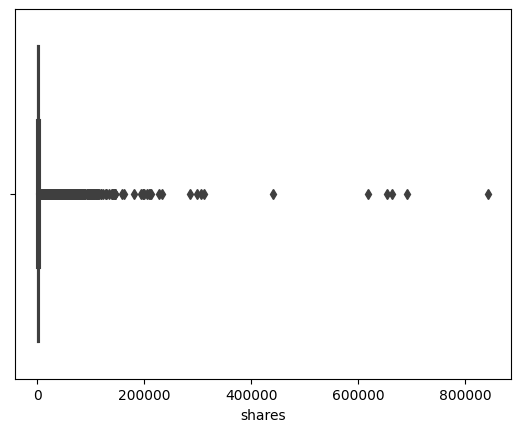

In [41]:
# Boxplot of the 'shares' column
sns.boxplot(x = 'shares', data = social)

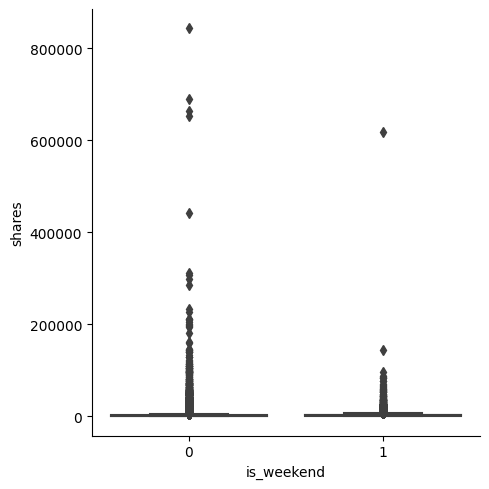

In [42]:
# Boxplot of 'shares' by 'weekend'
sns.catplot(x = 'is_weekend', y = 'shares', data = social, kind = 'box')

The Correlation Matrix and It's Plot

In [43]:
# Select the numeric columns
numeric_columns = social.select_dtypes(include = [np.number])

# Calculate the correlation matrix
corr = numeric_columns.corr()

# Print the correlation matrix
print(corr)

                              tokens_title  tokens_content  unique_tokens  \
tokens_title                      1.000000        0.018160      -0.005318   
tokens_content                    0.018160        1.000000      -0.004737   
unique_tokens                    -0.005318       -0.004737       1.000000   
non_stop_words                   -0.004754        0.017512       0.999572   
non_stop_unique_tokens           -0.005420        0.000373       0.999852   
hrefs                            -0.053496        0.423065      -0.004352   
self_refs                        -0.014856        0.304682       0.006620   
imgs                             -0.008858        0.342600       0.018802   
videos                            0.051460        0.103699      -0.000597   
token_length                     -0.071403        0.167789       0.026407   
keywords                         -0.006077        0.072845      -0.003679   
lifestyle                        -0.070815        0.037548      -0.001653   

<AxesSubplot: >

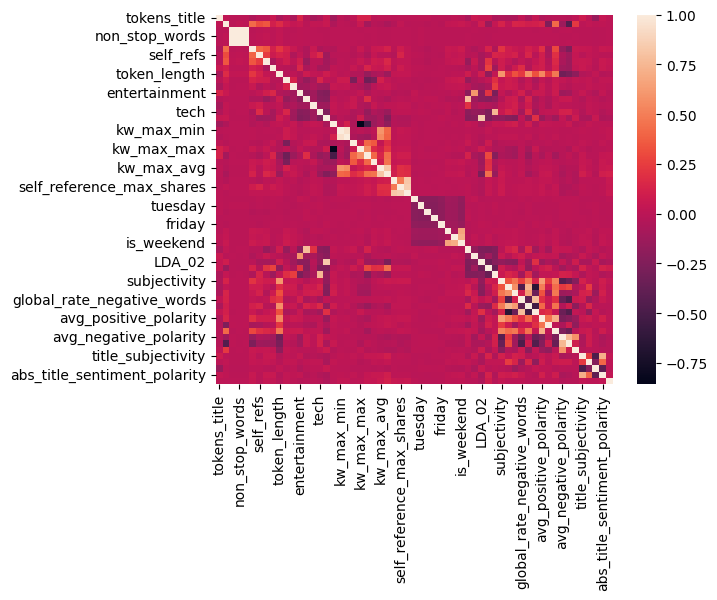

In [44]:
# Heatmap of the correlation matrix
sns.heatmap(corr)

<AxesSubplot: >

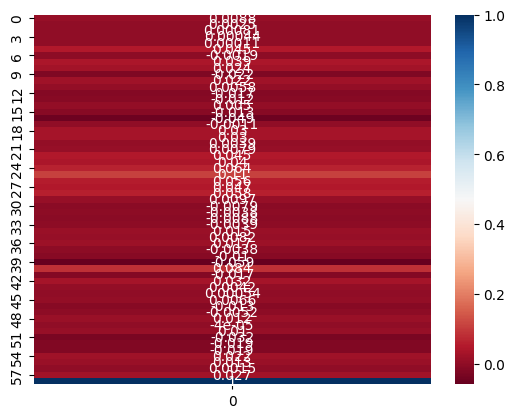

In [45]:
# Compute the correlations
corr_matrix = social.corr()['shares']

# Heatmap of the correlations
sns.heatmap(np.array(corr_matrix)[:, None], cmap = 'RdBu', annot = True)

<AxesSubplot: xlabel='is_weekend', ylabel='count'>

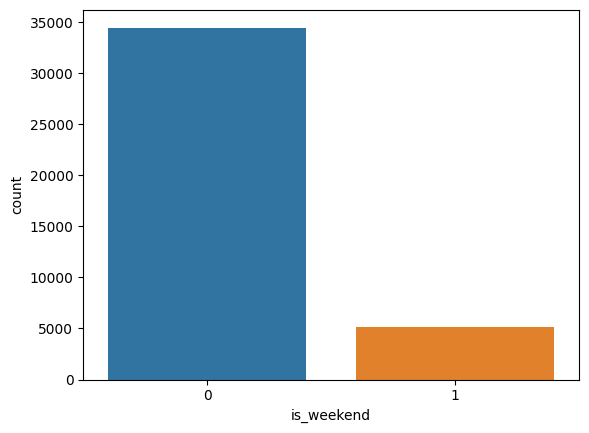

In [46]:
# Countplot of the 'weekend' column
sns.countplot(x = 'is_weekend', data = social)

### **REMOVING OUTLIERS**

In [3]:
def remove_outliers(df):
    df_clean = df.copy()
    
    # Loop over the columns of the dataframe
    for column in df.columns:
        # Calculate the interquartile range
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        
        # Skip column if the IQR is 0
        if iqr == 0:
            continue
        
        # Remove rows with values outside the range [q1 - 1.5 * iqr, q3 + 1.5 * iqr]
        mask = (df[column] >= q1 - 1.5 * iqr) & (df[column] <= q3 + 1.5 * iqr)
        df_clean = df_clean[mask]
        
    # Reset the index of the new dataframe
    df_clean = df_clean.reset_index(drop = True)
    
    return df_clean

# Remove outliers from all columns
social_clean = remove_outliers(social)

<AxesSubplot: >

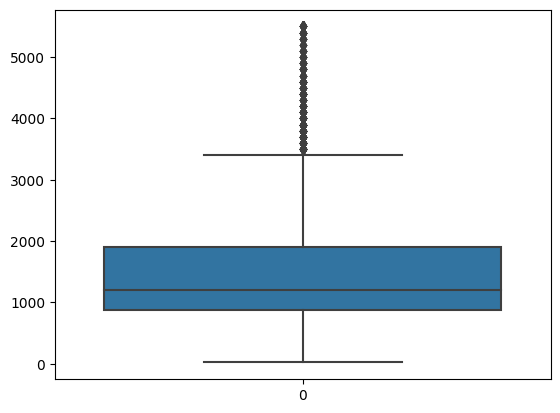

In [48]:
sns.boxplot(social_clean['shares'])

#### **Generating Train, Validation and Test Sets**

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def generate_sets(df, train_size = 0.8, test_size = 0.2):
    # Select the independent variables and the target column
    X = df.drop(columns = ['shares'])
    y = df['shares']
    
    # Split the data into train, validation, and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = train_size, test_size = test_size, random_state = 42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = test_size / (train_size + test_size), random_state = 42)
    
    # Scale the training data
    scaler_X = StandardScaler()
    X_train_scaled = scaler_X.fit_transform(X_train)
    
    scaler_y = StandardScaler()
    y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
    
    # Scale the test data using the scalers fitted to the training data
    X_test_scaled = scaler_X.transform(X_test)
    y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))
    
    # Scale the validation data using the scalers fitted to the training data
    X_val_scaled = scaler_X.transform(X_val)
    y_val_scaled = scaler_y.transform(y_val.values.reshape(-1, 1))
    
    return X_train_scaled, X_val_scaled, X_test_scaled, y_train_scaled, y_val_scaled, y_test_scaled



X_train, X_val, X_test, y_train, y_val, y_test = generate_sets(social)

#### **BUILDING THE MODEL**

##### **Neural Network**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()

# Add a hidden layer with 15 units and ReLU activation
model.add(Dense(units = 15, activation = 'relu', input_shape = (X_train.shape[1],)))

# Add an output layer with 15 unit and linear activation
model.add(Dense(units = 15, activation = 'linear'))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss = 'mean_squared_error', optimizer = 'adam')


# Fit the model to the training data
model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_data = (X_val, y_val))

#### **Hyperparamter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam


# Define a function that creates the model
def create_model(n_hidden_layers = 1, n_neurons = 32, learning_rate = 0.01):
    model = Sequential()
    model.add(Dense(n_neurons, input_dim = X_train.shape[1], activation = 'relu'))
    
    for i in range(n_hidden_layers):
        model.add(Dense(n_neurons, activation='relu'))
    
    model.add(Dense(1))
    model.compile(loss = 'mean_squared_error', optimizer = Adam(learning_rate = learning_rate))
    
    return model

# Create a KerasClassifier object
model = KerasRegressor(build_fn = create_model)

# Define the hyperparameter space
param_distributions = {'n_hidden_layers': [1, 2, 3, 4],
                      'n_neurons': [16, 32, 64, 128],
                      'learning_rate': [0.001, 0.01, 0.1]}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator = model, param_distributions = param_distributions, n_iter = 10, cv = 10, verbose = 1)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters
print(random_search.best_params_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Moe\AppData\Local\Temp\ipykernel_4160\2717983078.py:22: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn = create_model)


793/793 [==============================] - 1s 647us/step - loss: 0.9956
{'n_neurons': 64, 'n_hidden_layers': 3, 'learning_rate': 0.001}


In [ ]:
# Get the best hyperparameters from the random search
best_params = random_search.best_params_

# Build the model with the best hyperparameters
model = create_model(n_hidden_layers = best_params['n_hidden_layers'], n_neurons = best_params['n_neurons'], learning_rate = best_params['learning_rate'])

# Fit the model to the training data
model.fit(X_train, y_train, epochs = 10, verbose = 1)

Epoch 1/10
793/793 [==============================] - 1s 644us/step - loss: 0.9948
Epoch 2/10
793/793 [==============================] - 1s 653us/step - loss: 0.9817
Epoch 3/10
793/793 [==============================] - 1s 640us/step - loss: 0.9852
Epoch 4/10
793/793 [==============================] - 1s 645us/step - loss: 0.9673
Epoch 5/10
793/793 [==============================] - 1s 647us/step - loss: 0.9574
Epoch 6/10
793/793 [==============================] - 1s 649us/step - loss: 0.9146
Epoch 7/10
793/793 [==============================] - 1s 645us/step - loss: 0.8489
Epoch 8/10
793/793 [==============================] - 1s 640us/step - loss: 0.7756
Epoch 9/10
793/793 [==============================] - 1s 646us/step - loss: 0.6680
Epoch 10/10
793/793 [==============================] - 1s 646us/step - loss: 0.4547


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Get the model's predictions on the test data
predictions = model.predict(X_test)

# Compute the MSE, MAE, and R2
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the results
print(f'MSE: {mse:.2f}')
print(f'MAE: {mae:.2f}')
print(f'R2: {r2:.2f}')

248/248 [==============================] - 0s 451us/step
MSE: 0.85
MAE: 0.28
R2: 0.00


#### **Random Forest Regressor**

In [5]:
# Import the RandomForestRegressor class
from sklearn.ensemble import RandomForestRegressor

# Create an RFR object
rfr = RandomForestRegressor(n_jobs = -1)

# Fit the RFR to the training data
rfr.fit(X_train, np.ravel(y_train))

RandomForestRegressor(n_jobs=-1)

#### **Hyperparameter Tuning**

In [ ]:
from hyperopt import tpe, hp, Trials, fmin
from hyperopt import SparkTrials
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import pyspark



def objective(params):
   
   est = int(params['n_estimators'])
   md = int(params['max_depth'])
   msl = int(params['min_samples_leaf'])
   mss = int(params['min_samples_split'])
   
   model = RandomForestRegressor(n_estimators = est, max_depth = md, min_samples_leaf = msl, min_samples_split = mss, n_jobs = -1)
   
   scores = cross_val_score(model, X_train, np.ravel(y_train), cv = 10, scoring = 'neg_mean_squared_error')
   score = -scores.mean()  # negating the mean MSE to minimize the objective

   return score

def optimize(trial):
   
   params = {'n_estimators':hp.uniform('n_estimators', 100, 500),
           'max_depth':hp.uniform('max_depth', 5, 20),
           'min_samples_leaf':hp.uniform('min_samples_leaf', 1, 5),
           'min_samples_split':hp.uniform('min_samples_split', 2, 6)}
   
   best = fmin(fn = objective, space = params, algo = tpe.suggest, trials = SparkTrials(), max_evals = 5)
   
   return best

trial = Trials()
best = optimize(trial)

In [ ]:
# Build the RFR with the best hyperparameters
rfr = RandomForestRegressor(**best)

# Fit the RFR to the training data
rfr.fit(X_train, np.ravel(y_train))

In [ ]:
# Get the model's predictions on the test data
predictions = rfr.predict(X_test)

# Compute the R2 score
r2 = rfr.score(X_test, y_test)

# Print the R2 score
print(f'R2: {r2:.2f}')

R2: -0.08
